# Statistics Reference Notebook

## Definitions

- Discrete random variables:
    - random variables that can only take on discrete values (coin toss)
- Continuous random variables:
    - random variables that can take on an infinite number of values (masses of rocks)
- Probability distributions:
    - a mathematical description of outcomes
- Cumulative density function:
    - the probability of observing any specific value, $x$, *or* any value less than $x$, hence 'cumulative'
- Probability density function:
    - for continuous random variables, probability of observing any specific value $x$
    - note that this is the derivative of the CDF
    - EX: exponential, gamma, pareto, normal, etc.
- Probability mass function: 
    - the set of probabilities of discrete outcomes
    - similar to PDF, but for discrete random variables, 
    - EX: binomial, hypergeometric, Poisson, geometric, etc.

## Summary Statistics

When using `df.describe()` a statistical summary of the DataFrame is returned. 
<br>

- Count:
    - When used against a Series, returns a scalar integer of the number of non-null values
    - When used against a DataFrame, returns a list of scalar integers as for Series 
- Mean:
    - Computes the average, susceptible to influence from outliers
- Median:
    - The middle value of a dataset, immune to influence from outliers
- Standard Deviation:
    - Computes the standard deviation, a measure of the 'spread' of the data 
- Minimum:
    - Computes the minimum. When used on a string, returns the first alphabetical 
- Maximum:
    - Computes the maximum. When used on a string, returns the last alphabetical 

## Quantiles, Quartiles, Percentiles

Percentiles and quartiles are examples of quantiles.

A note on quantiles: the qth quantile of a dataset splits the data into two sets. One with the fraction q of smaller observations and one with larger observations.

- 25%, first quartile:
    - Computes the first quartile
- 50%, median / second quartile:
    - Computes the median
- 75%, third quartile:
    - Computes the third quartile
    
|   quartile   |   quantile    |   percentile   |
|--------------|---------------|----------------|
| 0 quartile   |  0   quantile |  0 percentile  |
| 1 quartile   | 0.25 quantile | 25 percentile  |
| 2 quartile   | 0.50 quantile | 50 percentile  |
| 3 quartile   | 0.75 quantile | 75 percentile  |
| 4 quartile   |  1 quantile   | 100 percentile |

## Variance and Standard Deviation

The variance and standard deviation quantify the 'spread' of the data. These are easily computable with numpy functions `np.var()` and `np.std()`.

In [33]:
# works
variance = np.var(petal_length)
print(f'variance: \t\t{variance}')
std = np.std(petal_length)
print(f'standard deviation: \t{std}')

variance: 		0.21640000000000004
standard deviation: 	0.4651881339845203


## Covariance and Pearson Coefficient

Covariance is a measure of how two quantities vary *together*. If x is high when y is high, then x and y are positively correlated. If x is high when y is low (or vice-versa), then x and y are negatively correlated.

<p></p><img src="images/covar.png" width="350"><p></p>

The Pearson correlation coefficient is a dimensionless version of the covariance obtained by dividing the covariance by the standard deviation of both x and y.

$$ \rho = \frac{cov(x,y)}{\sigma_x\sigma_y } = \frac{\textrm{variability due to codependence}}{\textrm{independent variability}} $$

Here is an example showing different pearson coefficients:

<p></p><img src="images/pearco.png"><p></p>

Covariance can be computed using the numpy function `np.cov()`. This function returns a covariance matrix identifying the self variance (`[0,0]` or `[1,1]`) and covariance (`[0,1]` or `[1,0]`). 

In [29]:
# works
cov_mat = np.cov(petal_length, petal_width)
print(f'covariance matrix: \n{cov_mat}')
petal_cov = covariance_matrix[0,1]
print(f'petal covariance: \n  {petal_cov}')

covariance matrix: 
[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
petal covariance: 
  0.07310204081632653


The Pearson coefficient is often easier to interpret than the covariance and can be computed using the numpy function `np.corrcoef()`. This function returns a matrix similar to the covariance matrix. Here, the values at `[0,0]` and `[1,1]` must equal `1` as this is the variance with itself. The value at `[0,1]` is what we are interested in.

In [30]:
# works
corr_mat = np.corrcoef(petal_length,petal_width)
r = corr_mat[0,1]
print(f'Pearson coefficient: {r}')

Pearson coefficient: 0.7866680885228169


## Z-Scores

Using the zscore function, you can apply a `.transform()` method after grouping to apply a function to groups of data independently. The z-score is also useful to find outliers: a z-score value of +/- 3 is generally considered to be an outlier.

In [ ]:
# no working data
from scipy.stats import zscore
df.groupby('region')['life','fertility'].transform(zscore)

## Histograms

Histograms are useful for visualizing the distribution of data for a given measurement.

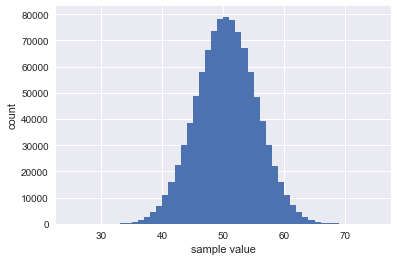

In [61]:
np.random.seed(45)
samples = np.random.binomial(100,0.5,1000000)

_ = plt.hist(samples,bins=50)
plt.xlabel('sample value')
plt.ylabel('count')
plt.show()

### Bins

Bins can make a significant difference on the representation of the data, this is referred to as 'binning bias'. The default number of bins in `matplotlib.pyplot` is 10.

The 'square root rule' is a commonly used rule of thumb for choosing the number of bins: choose the number of bins to be the square root of the number of samples.

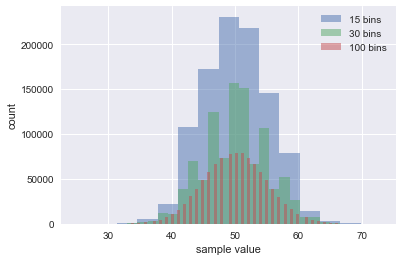

In [69]:
np.random.seed(30)
samples = np.random.binomial(100,0.5,1000000)

_ = plt.hist(samples,bins=15,alpha=0.5)
_ = plt.hist(samples,bins=30,alpha=0.5)
_ = plt.hist(samples,bins=100,alpha=0.5)
plt.xlabel('sample value')
plt.ylabel('count')
plt.legend(('15 bins','30 bins','100 bins'))
plt.show()

## Bee swarm plots

In order to avoid binning bias, a bee swarm plot can be used to show the data 'as is'. Note that bee swarm plots can lose their value when the number of data points grows too large. In that case you can use a box plot or an ECDF.

In [ ]:
# no working data
_ = sns.swarmplot(x='species',y='petal length (cm)',data=df)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

<p></p><img src="images/bee_swarm.png"><p></p>

## Empirical cumulative distribution function (ECDF)

The x-axis is the sorted data, the y-axis is a set of evenly spaced data points from 0 to 1. You can also plot multiple ECDFs to compare to each other by calling `plt.plot()` multiple times. A function to calculate the ECDF is given below, followed by an example.

In [70]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

In [ ]:
# no working data
x = np.sort(df_swing['dem_share'])
y = np.arrange(1, len(x)+1)/len(x)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # padding
plt.show()

<p></p><img src="images/ecdf1.png"><p></p>

This plot can be read as: <br>
>20% of counties had 36% or less vote for Obama

## Box Plots

Box plots are useful for summarizing a large amount of data by it's percentiles. Here is a summary of it's features:
- the center of the box represents the median (50th percentile)
- the upper end of the box represents the 75th percentile
- the lower end of the box represents the 25th percentile
- the total height of the box contains the middle 50% of the data and is called the interquartile range (IQR)
- the whiskers extend 1.5 * IQR or to the extent of the data, whichever is less extreme
- all data beyond the whiskers are plotted as points and referred to as outliers
- data points > 2.0 * IQR are generally accepted as outliers

<p></p><img src="images/box_plot.png"><p></p>


In [ ]:
# no working data
_ = sns.boxplot(x='species',y='petal length (cm)',data=df)
plt.xlabel('species')
plt.ylabel('petal length (cm)')
plt.show()

## Data Simulation

Hacker statistics uses simulated repeated measurements to compute probabilities as opposed to classical pen and paper statistics. This is similar to a numerical solution versus an analytical one.

As an example, a binomial distribution with a probability of 50% was used to simulate 100 coin tosses 10,000 times returning an array with the number of successes for each iteration.

**Remember**, *if you can simulate a story, you can get it's distribution.*

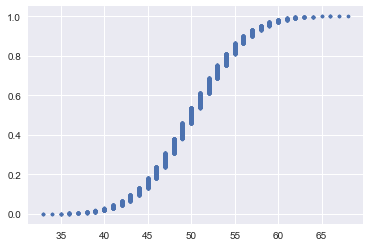

In [12]:
data = np.random.binomial(n=100,p=0.5,size=10000)
x = np.sort(data)
y = np.arange(1,len(data)+1)/len(data)

_ = plt.plot(x,y,marker='.',linestyle='none')
plt.show()

### Plotting the binomial PMF

Here we will use a histogram for simplicity.

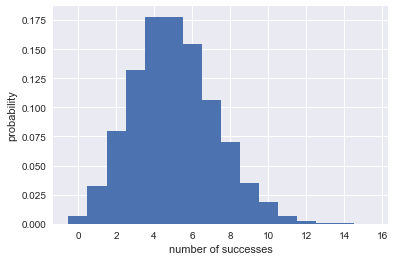

In [26]:
data = np.random.binomial(n=100,p=0.05,size=10000)
# this bin setup allows centering on integers
bins = np.arange(0, max(data)+1.5) - 0.5

_ = plt.hist(data,bins=bins,density=True)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('probability')
plt.show()

### Plotting the Poisson CDF 

The timing of one event is completely independent from the timing of any other event. Examples would be meteor strikes and hits on a website - these can be described as an average per day, but predicting the time that any one will occur is independent of the last one.

A more detailed explanation: <br>
The Poisson distribution is a limit of the Binomial distribution for rare events. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, so we would expect to get about 6 successes. This is similar to Poisson, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small).

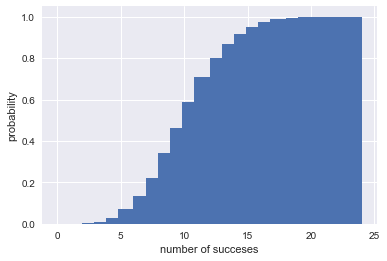

In [30]:
data = np.random.poisson(10,10000)

_ = plt.hist(data,bins=int(np.sqrt(len(data))),cumulative=True,density=True)
_ = plt.xlabel('number of succeses')
_ = plt.ylabel('probability')
plt.show()

### Plotting the normal PDF

The normal distribution is also referred to as the Gaussian distribution. Be cautious, even though a distrubtion may appear normally distrubted at first, in many cases it is not. When in doubt, check the normal CDF.

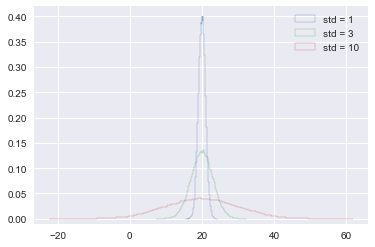

In [6]:
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

_ = plt.hist(samples_std1,density=True,histtype='step',bins=100)
_ = plt.hist(samples_std3,density=True,histtype='step',bins=100)
_ = plt.hist(samples_std10,density=True,histtype='step',bins=100)
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### Plotting the normal CDF


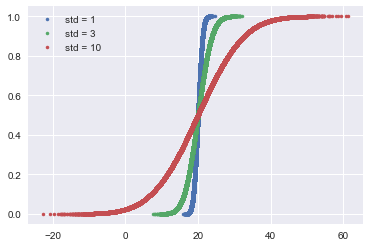

In [97]:
samples_std1 = np.random.normal(20,1,size=100000)
samples_std3 = np.random.normal(20,3,size=100000)
samples_std10 = np.random.normal(20,10,size=100000)

x_std1,y_std1 = ecdf(samples_std1)
x_std3,y_std3 = ecdf(samples_std3)
x_std10,y_std10 = ecdf(samples_std10)
bins = int(np.sqrt(len(x_std1)))

_ = plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_ = plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_ = plt.plot(x_std10,y_std10,marker='.',linestyle='none')
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='upper left')
plt.show()

To compare the CDF of a given distribution to that of a normally distributed CDF with the same mean and standard deviation, use the following technique.

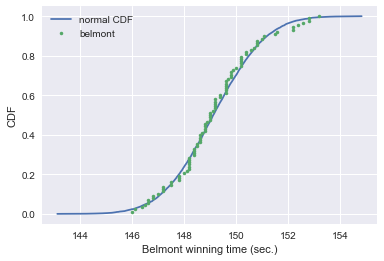

In [36]:
mu = np.mean(belmont)
sigma = np.std(belmont)
samples = np.random.normal(mu,sigma,size=10000)

x_theor = np.sort(samples)
y_theor = np.arange(1,len(samples)+1)/len(samples)
x = np.sort(belmont)
y = np.arange(1,len(belmont)+1)/len(belmont)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
_ = plt.legend(('normal CDF','belmont'), loc='upper left')
plt.show()

As a fun extension, let's calculate the chances of a horse matching or beating the legendary Secretariat's record. In order to do this, we need to assume that the `belmont` data is normally distributed.

In [37]:
mu = np.mean(belmont)
sigma = np.std(belmont)
samples = np.random.normal(mu,sigma,size=1000000)

prob = sum(samples <= 144)/len(samples)
print(f'Probability of beating Secretariat: {prob}')

Probability of beating Secretariat: 0.000638


### Plotting the exponential distribution

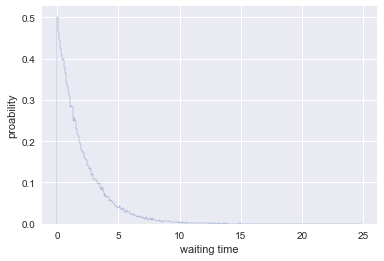

In [45]:
samples = np.random.exponential(2,size=100000)

_ = plt.hist(
    samples,
    bins=int(np.sqrt(len(samples))),
    density=True,
    histtype='step')
plt.xlabel('waiting time')
plt.ylabel('proability')
plt.show()

## END: Supporting data

In [73]:
# RUN ME
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

petal_length = [
    4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0,
    4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4,
    4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
    4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1]
petal_width = [
    1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0,
    1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
    1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
    1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]
belmont = [
    148.5, 146.6, 148.5, 150.7, 150.4, 150.8, 151.5, 147.5,
    149.6, 148.4, 147.8, 148.7, 147.5, 148.2, 149.7, 146.5,
    151.1, 147.8, 149.1, 148.8, 148.9, 152.2, 146.8, 149.9,
    146.1, 148.1, 147.2, 146.0, 146.4, 148.2, 149.8, 147.0,
    147.2, 147.8, 148.2, 149.0, 149.8, 148.6, 146.8, 149.6,
    149.0, 148.2, 149.2, 148.0, 150.4, 148.8, 147.2, 148.8,
    149.6, 148.4, 148.4, 150.2, 148.8, 149.2, 149.2, 148.4,
    150.2, 146.6, 149.8, 149.0, 150.8, 148.6, 150.2, 149.0,
    148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2,
    149.2, 151.0, 149.6, 149.6, 149.4, 148.6, 150.0, 150.6,
    149.2, 152.6, 152.8, 149.6, 151.6, 152.8, 153.2, 152.4 
]